In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
movie = pd.read_csv('../data/movie_easy.csv')
rating = pd.read_csv('../data/rating.csv')
user = pd.read_csv('../data/user_easy.csv')

In [3]:
movie.head()

,movie_id,title,year,rtAllCriticsRating,rtAudienceRating,rtAllCriticsNumReviews,rtAudienceNumRatings,rtAllCriticsScore,rtAudienceScore
0,1,Toy Story,1995,9.0,3.7,73,102338,100,81
1,2,Jumanji,1995,5.6,3.2,28,44587,46,61
2,3,Grumpier Old Men,1995,5.9,3.2,36,10489,66,66
3,4,Waiting to Exhale,1995,5.6,3.3,25,5666,56,79
4,5,Father of the Bride Part II,1995,5.3,3.0,19,13761,47,64


In [4]:
movie.columns

Index(['movie_id', 'title', 'year', 'rtAllCriticsRating', 'rtAudienceRating',
       'rtAllCriticsNumReviews', 'rtAudienceNumRatings', 'rtAllCriticsScore',
       'rtAudienceScore'],
      dtype='object')

In [5]:
rating.head()

,user_id,movie_id,rating
0,1,1193,5
1,2,1193,5
2,12,1193,4
3,15,1193,4
4,17,1193,5


In [6]:
user.head()

,user_id,gender,age
0,1,0,12
1,2,1,60
2,3,1,30
3,4,1,47
4,5,1,30


In [7]:
user_rating = rating.merge(user, on='user_id')

In [8]:
user_rating.head()

,user_id,movie_id,rating,gender,age
0,1,1193,5,0,12
1,1,661,3,0,12
2,1,914,3,0,12
3,1,3408,4,0,12
4,1,2355,5,0,12


In [10]:
urgb = user_rating.groupby('user_id')

In [25]:
cnt = urgb.agg({'rating': np.size}).sort_values(by='rating')
cnt.head()

,rating
user_id,
341,18
2292,19
2160,19
250,19
2819,19


In [26]:
cnt.tail()

,rating
user_id,
1181,1503
1941,1573
4277,1714
1680,1832
4169,2264


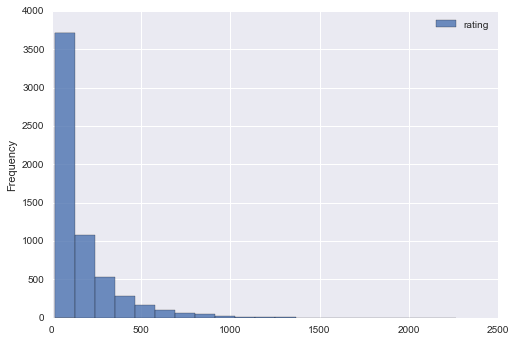

In [12]:
urgb.agg({'rating': np.size}).plot(kind='hist', bins=20, alpha=0.8)

In [13]:
urgb.agg({'rating': np.size}).sort_values(by='rating', ascending= False)

,rating
user_id,
4169,2264
1680,1832
4277,1714
1941,1573
1181,1503
889,1493
3618,1322
2063,1299
1150,1286


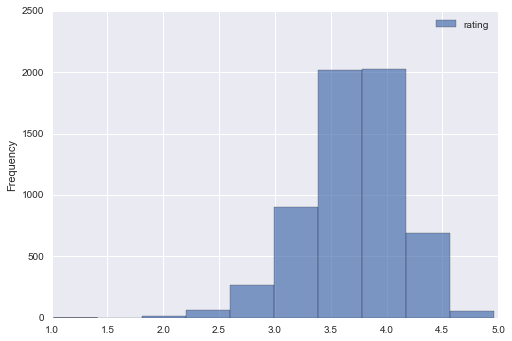

In [14]:
urgb.agg({'rating': np.mean}).plot(kind='hist', bins=10, alpha=0.7)

In [15]:
mvgb=user_rating.groupby('movie_id')

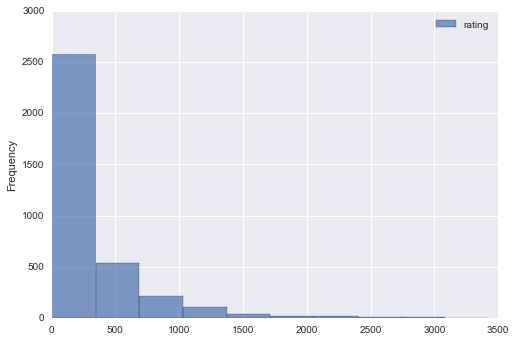

In [16]:
mvgb.agg({'rating': np.size}).plot(kind='hist', alpha=0.7)

In [17]:
user_rating[user_rating['user_id']==1]

,user_id,movie_id,rating,gender,age
0,1,1193,5,0,12
1,1,661,3,0,12
2,1,914,3,0,12
3,1,3408,4,0,12
4,1,2355,5,0,12
5,1,1197,3,0,12
6,1,1287,5,0,12
7,1,2804,5,0,12
8,1,594,4,0,12
9,1,919,4,0,12


In [27]:
train1 = rating[rating['user_id']==1].merge(movie, on='movie_id')